In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
  #  for filename in filenames:
   #     print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
traindf = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
testdf = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

Take a quick look at the data

In [3]:
print(traindf.info())
traindf.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,20758.00000,20758,20758.000000,20758.000000,20758.000000,20758,20758,20758.000000,20758.000000,20758,20758,20758.000000,20758,20758.000000,20758.000000,20758,20758,20758
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,NaN,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,10422,NaN,NaN,NaN,17014,18982,NaN,NaN,17529,20513,NaN,20071,NaN,NaN,15066,16687,4046
mean,10378.50000,NaN,23.841804,1.700245,87.887768,NaN,NaN,2.445908,2.761332,NaN,NaN,2.029418,NaN,0.981747,0.616756,NaN,NaN,NaN
std,5992.46278,NaN,5.688072,0.087312,26.379443,NaN,NaN,0.533218,0.705375,NaN,NaN,0.608467,NaN,0.838302,0.602113,NaN,NaN,NaN
min,0.00000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,5189.25000,NaN,20.000000,1.631856,66.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.792022,NaN,0.008013,0.000000,NaN,NaN,NaN
50%,10378.50000,NaN,22.815416,1.700000,84.064875,NaN,NaN,2.393837,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.573887,NaN,NaN,NaN
75%,15567.75000,NaN,26.000000,1.762887,111.600553,NaN,NaN,3.000000,3.000000,NaN,NaN,2.549617,NaN,1.587406,1.000000,NaN,NaN,NaN


In [4]:
print(traindf.shape)
print(testdf.shape)

(20758, 18)
(13840, 17)


<h1>Part 1 Problem and Data</h1>
The dataset is a health-related dataset designed for estimating obesity levels in individuals. Data was collected from individuals in Mexico, Peru, and Colombia. The goal is to predict an individual's obesity risk based on given variables.
The training data contains 20758 observations and 17 variables. Some of the variables include information about eating habits, physical condition, activity and demographics.
The target variable that we need to predict is NObeyesdad, which classified individuals into seven obesity levels based on BMI: Insufficient Weight, Normal Weight, Overweight Level I and II, and Obesity Type I, II, and III. 

The competition and dataset can be found here:
https://www.kaggle.com/competitions/playground-series-s4e2/overview

<h1>Part 2 Exploratory Data Analysis</h1>
In this section, we will do the following:
-  Check that the columns match between training and test
-  Check for NULL values
-  Look at the correlation matrix to see if there is any collinearity
-  Visualize overall data distributiojn
-  Feature Engineering

Check that the columns in training data match the test data

In [5]:
testdf.columns == traindf.columns[:-1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
traindf.dtypes.value_counts()

object     9
float64    8
int64      1
Name: count, dtype: int64

We have 8 category values and 8 numeric values. Let's check if we have null values.

In [7]:
print(traindf.isnull().sum())
print(testdf.isnull().sum())


id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC           

Looks like there are no NULL values, the data is very clean

Let's plot the distribution curve of the variables.

Training Data Shape: (20758, 18)

First 5 rows:


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()



Data Types:
id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Summary Statistics:


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,20758.00000,20758,20758.000000,20758.000000,20758.000000,20758,20758,20758.000000,20758.000000,20758,20758,20758.000000,20758,20758.000000,20758.000000,20758,20758,20758
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,NaN,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,10422,NaN,NaN,NaN,17014,18982,NaN,NaN,17529,20513,NaN,20071,NaN,NaN,15066,16687,4046
mean,10378.50000,NaN,23.841804,1.700245,87.887768,NaN,NaN,2.445908,2.761332,NaN,NaN,2.029418,NaN,0.981747,0.616756,NaN,NaN,NaN
std,5992.46278,NaN,5.688072,0.087312,26.379443,NaN,NaN,0.533218,0.705375,NaN,NaN,0.608467,NaN,0.838302,0.602113,NaN,NaN,NaN
min,0.00000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,5189.25000,NaN,20.000000,1.631856,66.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.792022,NaN,0.008013,0.000000,NaN,NaN,NaN
50%,10378.50000,NaN,22.815416,1.700000,84.064875,NaN,NaN,2.393837,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.573887,NaN,NaN,NaN
75%,15567.75000,NaN,26.000000,1.762887,111.600553,NaN,NaN,3.000000,3.000000,NaN,NaN,2.549617,NaN,1.587406,1.000000,NaN,NaN,NaN



Missing Values:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


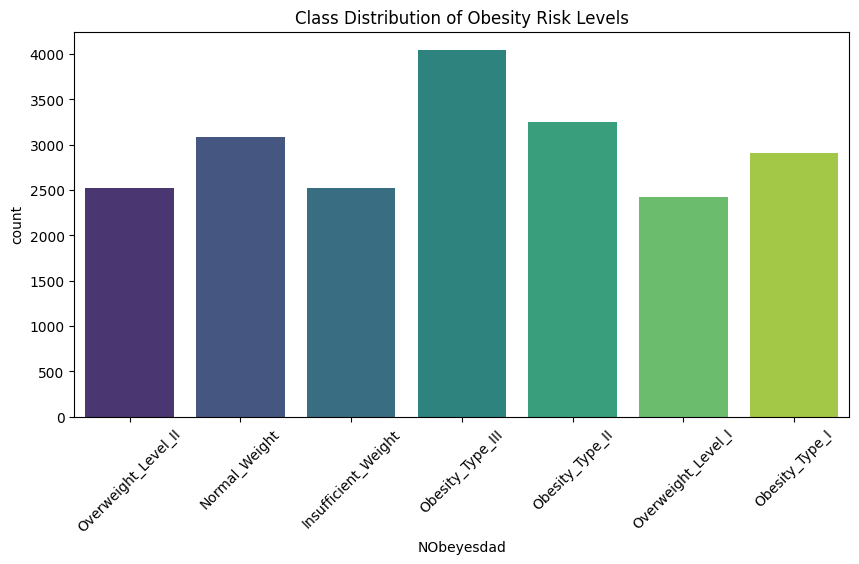

<Figure size 1500x1000 with 0 Axes>

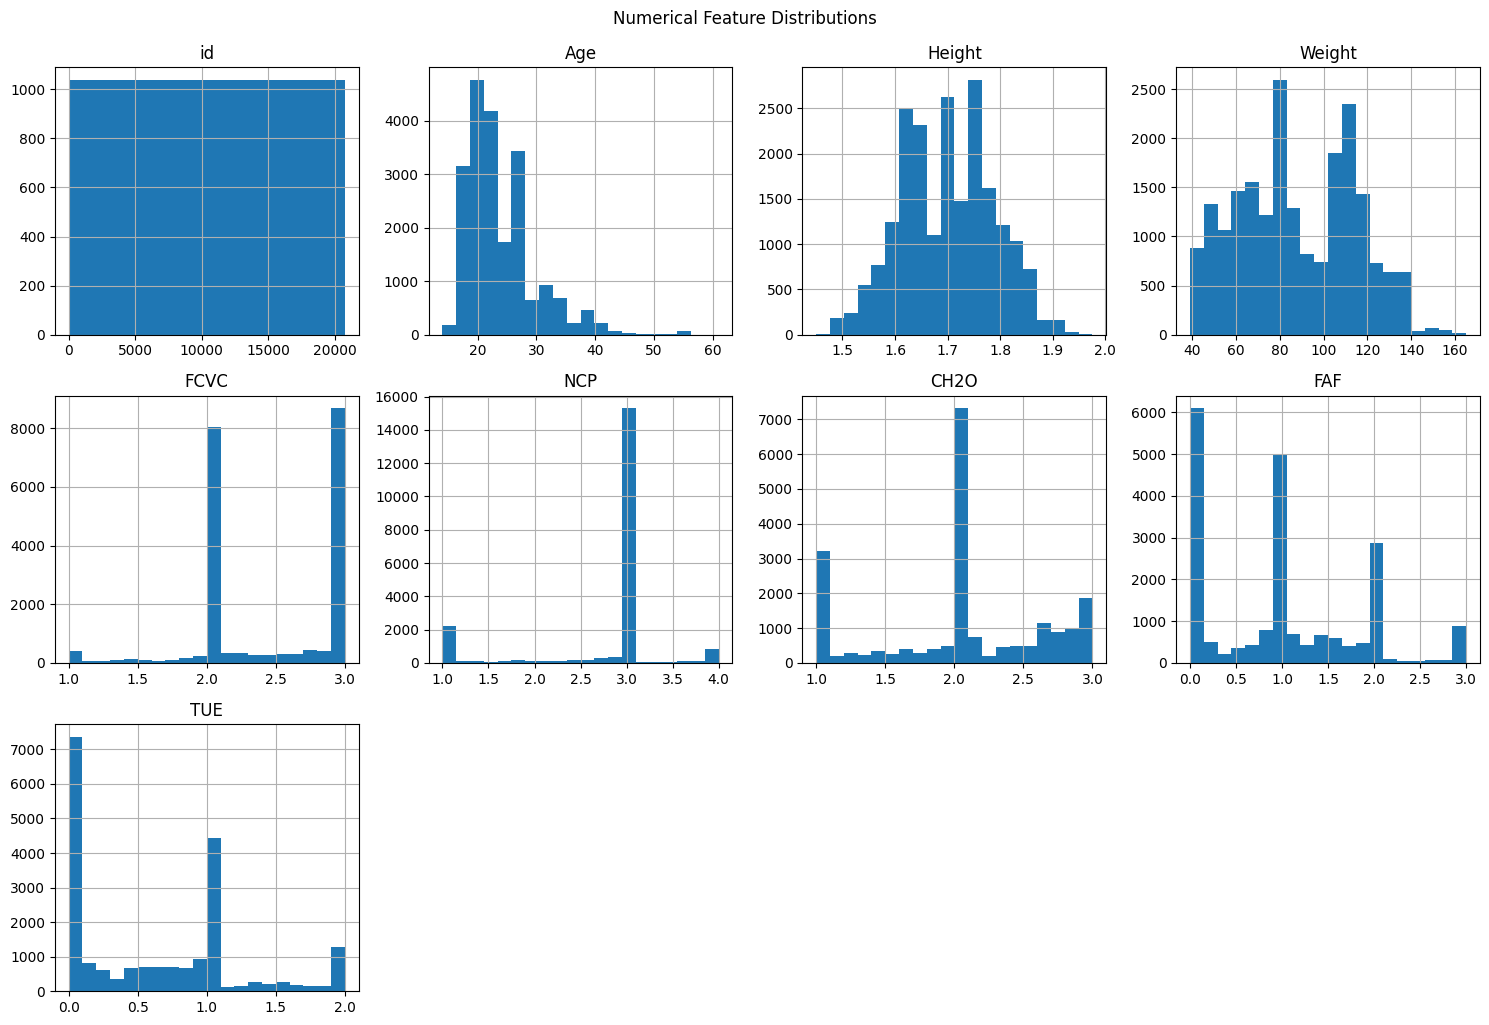

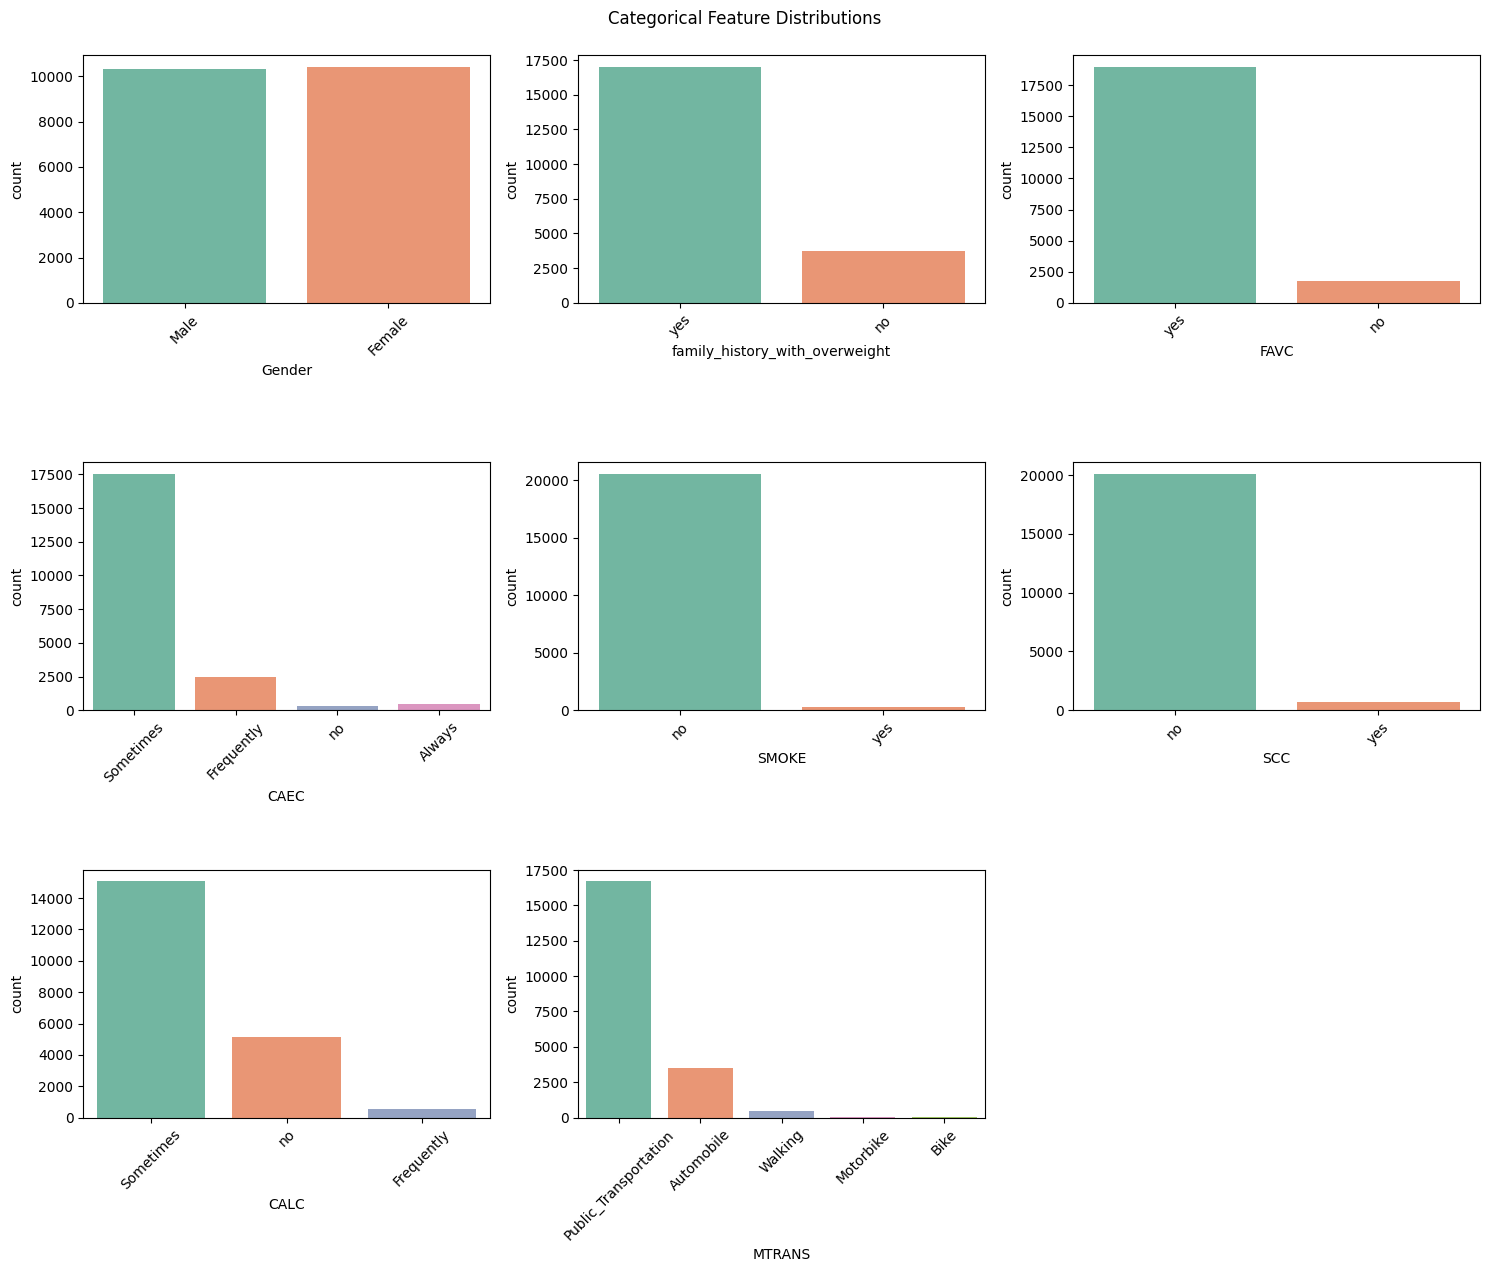

In [8]:
print("Training Data Shape:", traindf.shape)
print("\nFirst 5 rows:")
display(traindf.head())

print("\nData Types:")
print(traindf.dtypes)

print("\nSummary Statistics:")
display(traindf.describe(include='all'))

print("\nMissing Values:")
print(traindf.isnull().sum())

plt.figure(figsize=(10, 5))
sns.countplot(x='NObeyesdad', data=traindf, palette='viridis')
plt.title('Class Distribution of Obesity Risk Levels')
plt.xticks(rotation=45)
plt.show()

# 2.4 Numerical Features Analysis
numerical = traindf.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
traindf[numerical].hist(bins=20, layout=(3, 4), figsize=(15, 10))
plt.tight_layout()
plt.suptitle('Numerical Feature Distributions', y=1.02)
plt.show()

categorical = traindf.select_dtypes(include=['object']).columns.drop('NObeyesdad')
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=col, data=traindf, palette='Set2')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle('Categorical Feature Distributions', y=1.02)
plt.show()



Visualize Correlation - check for collinearity

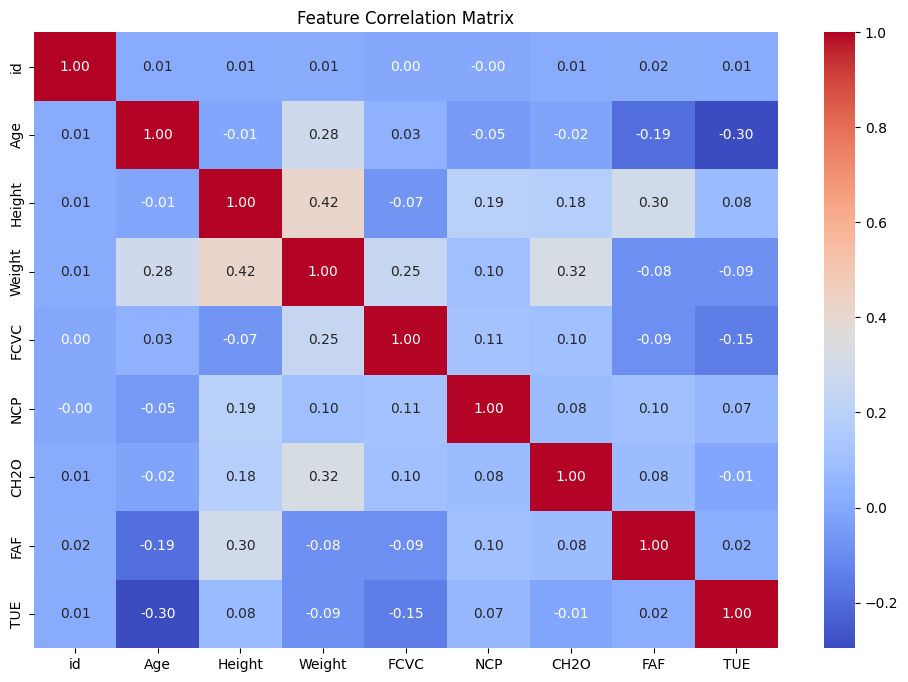

In [9]:
plt.figure(figsize=(12, 8))
corr_matrix = traindf.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

There doesn't seem to be any feature pairs that are correlated with each other.

<h2>Feature Engineering</h2>
We are planning to use K-mean clustering algorithm for this project so we can start to consider categorical variables.
Categorical variables are not applicable to K-means clustering algorithm. We will need to transform the categorical data to numerical data. We will have to rank some of the variables for them to make sense.

In [10]:
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC','CAEC', 'SMOKE','SCC','CALC','MTRANS']
#ct = pd.crosstab(traindf['Gender'], traindf['NObeyesdad'], normalize='index')
#ct.plot(kind='bar', stacked=True)
#plt.ylabel("Proportion")
#plt.title("Distribution of Obesity Categories by Gender")
#plt.show()

Let's create a new feature called BMI and see if it is valid. We may be able to replace both weight and height features with 1 feature which is more meaningful.

In [11]:
traindf['BMI']=traindf['Weight']/(traindf['Height']*traindf['Height'])
testdf['BMI']=testdf['Weight']/(testdf['Height']*testdf['Height'])



Visualize the obesity risk distribution based on categories. This will help us determine what value to assign to each category when we convert them into numbers.

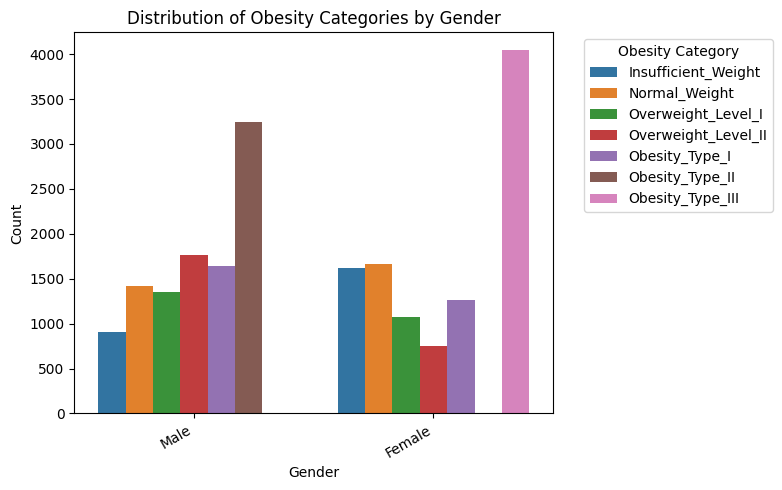

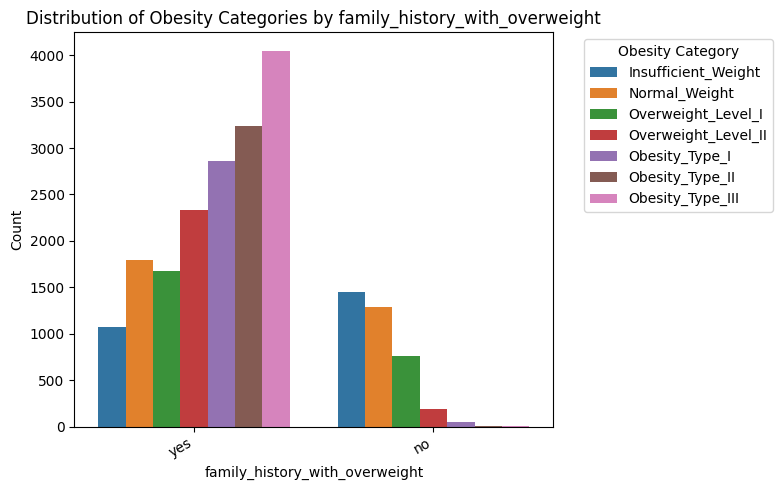

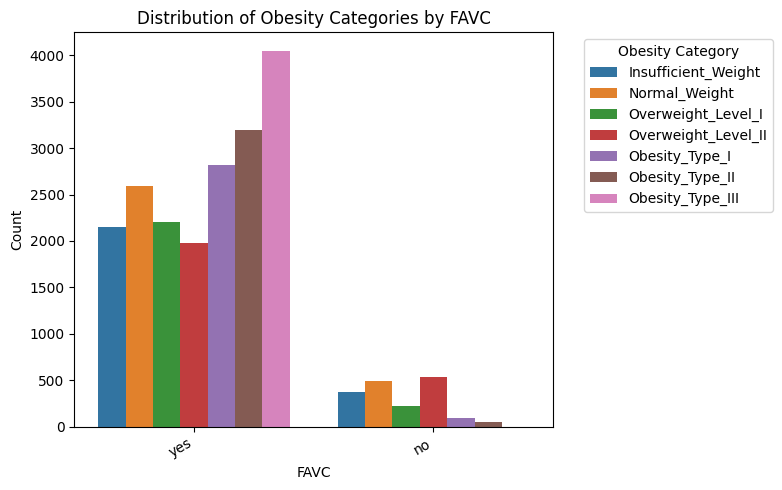

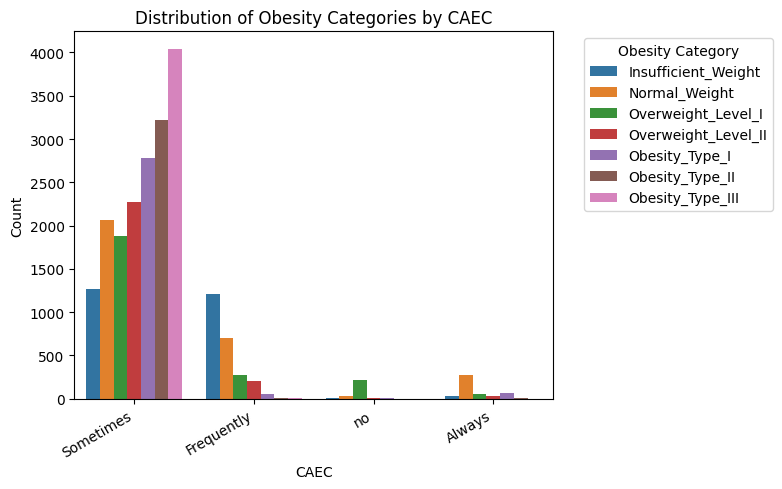

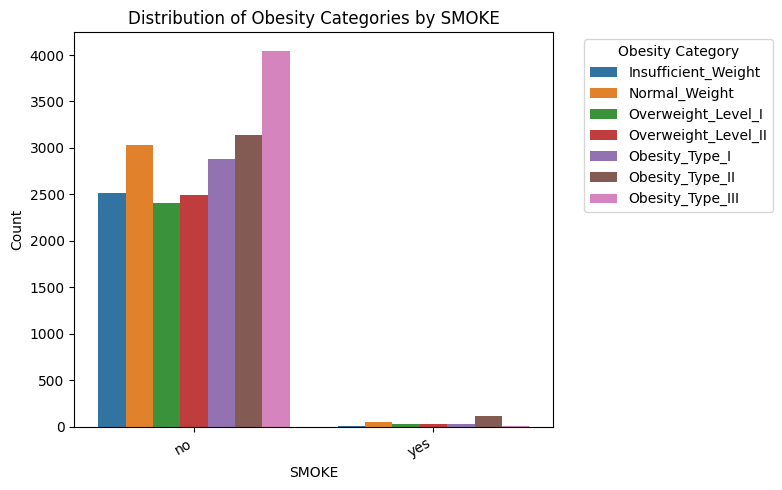

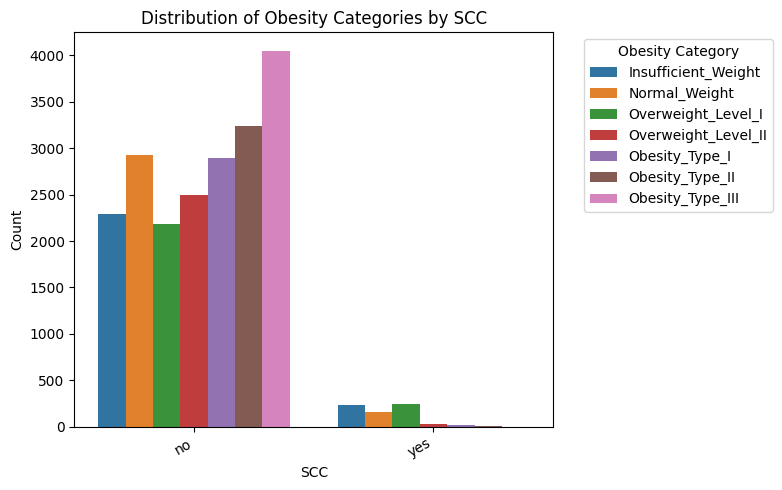

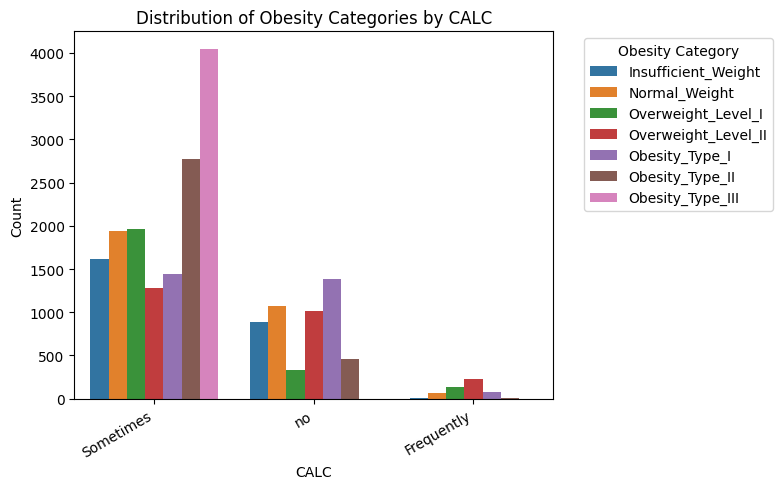

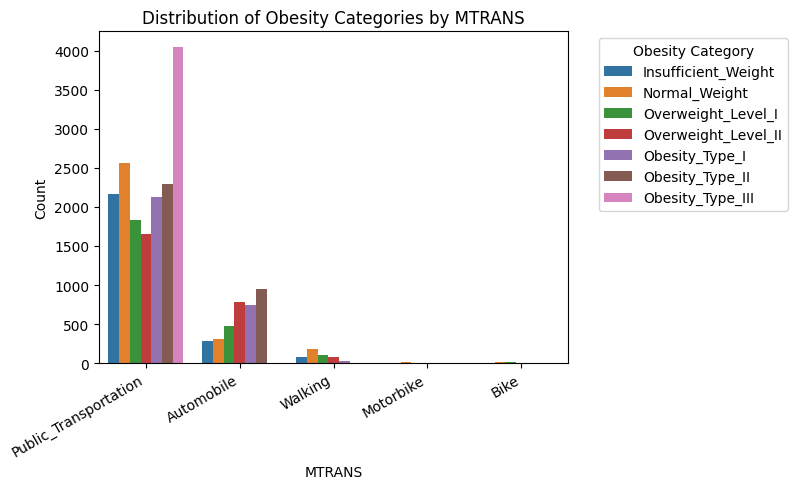

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical predictors
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC','CAEC', 
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Define target class order
obesity_order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                 "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II","Obesity_Type_III"]

# Loop through each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    
    sns.countplot(data=traindf, x=var, hue="NObeyesdad", hue_order=obesity_order)
    
    plt.title(f"Distribution of Obesity Categories by {var}")
    plt.ylabel("Count")
    plt.xlabel(var)
    plt.xticks(rotation=30, ha="right")
    plt.legend(title="Obesity Category", bbox_to_anchor=(1.05, 1), loc="upper left")
    
    plt.tight_layout()
    plt.show()

There's an uneven distribution amoungst feature values, so we need to normalize the data. For example, it's hard to tell how Mode of Transportation affects obesity risk. It will be easier see the distribution amoungst each category value after normalizing.

NObeyesdad  Insufficient_Weight  Normal_Weight  Overweight_Level_I  \
Gender                                                               
Female                 0.155536       0.159278            0.102667   
Male                   0.087268       0.137577            0.131289   

NObeyesdad  Overweight_Level_II  Obesity_Type_I  Obesity_Type_II  \
Gender                                                             
Female                 0.072443        0.121570         0.000768   
Male                   0.170956        0.158959         0.313467   

NObeyesdad  Obesity_Type_III  
Gender                        
Female              0.387737  
Male                0.000484  


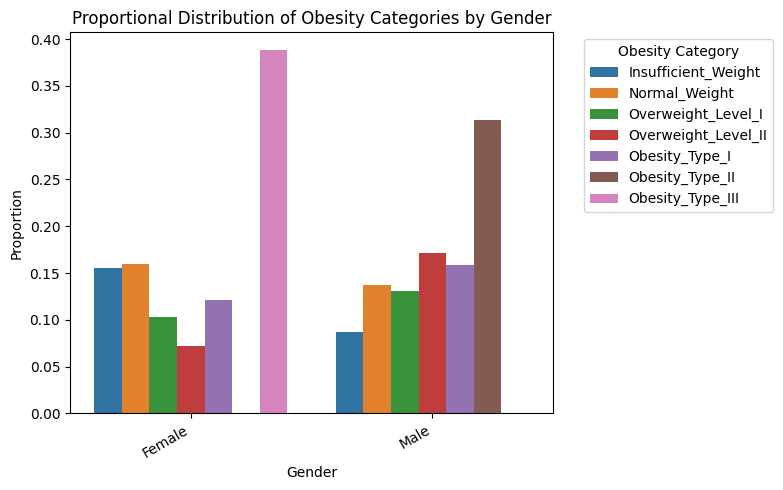

NObeyesdad                      Insufficient_Weight  Normal_Weight  \
family_history_with_overweight                                       
no                                         0.387019       0.345085   
yes                                        0.063124       0.105207   

NObeyesdad                      Overweight_Level_I  Overweight_Level_II  \
family_history_with_overweight                                            
no                                        0.201923             0.051549   
yes                                       0.098213             0.136887   

NObeyesdad                      Obesity_Type_I  Obesity_Type_II  \
family_history_with_overweight                                    
no                                    0.012821         0.001335   
yes                                   0.168214         0.190608   

NObeyesdad                      Obesity_Type_III  
family_history_with_overweight                    
no                                      0.00026

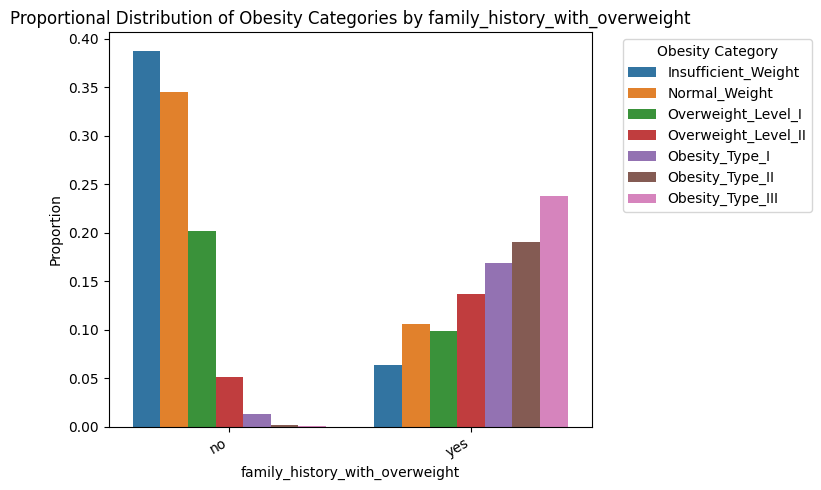

NObeyesdad  Insufficient_Weight  Normal_Weight  Overweight_Level_I  \
FAVC                                                                 
no                     0.208333       0.278716            0.126126   
yes                    0.113423       0.136287            0.116057   

NObeyesdad  Overweight_Level_II  Obesity_Type_I  Obesity_Type_II  \
FAVC                                                               
no                     0.303491        0.052365         0.030405   
yes                    0.104467        0.148404         0.168265   

NObeyesdad  Obesity_Type_III  
FAVC                          
no                  0.000563  
yes                 0.213097  


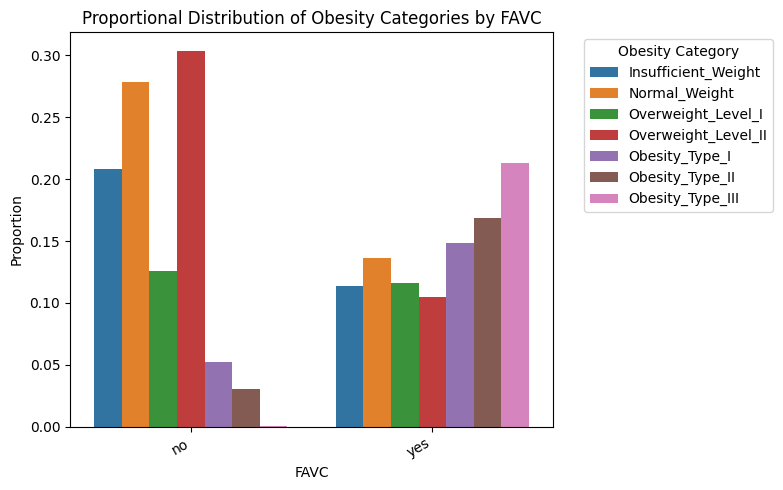

NObeyesdad  Insufficient_Weight  Normal_Weight  Overweight_Level_I  \
CAEC                                                                 
Always                 0.073222       0.575314            0.125523   
Frequently             0.490291       0.285599            0.110437   
Sometimes              0.072337       0.117805            0.106966   
no                     0.028674       0.129032            0.784946   

NObeyesdad  Overweight_Level_II  Obesity_Type_I  Obesity_Type_II  \
CAEC                                                               
Always                 0.069038        0.133891         0.020921   
Frequently             0.084951        0.022654         0.004854   
Sometimes              0.129671        0.158708         0.183924   
no                     0.021505        0.028674         0.007168   

NObeyesdad  Obesity_Type_III  
CAEC                          
Always              0.002092  
Frequently          0.001214  
Sometimes           0.230589  
no             

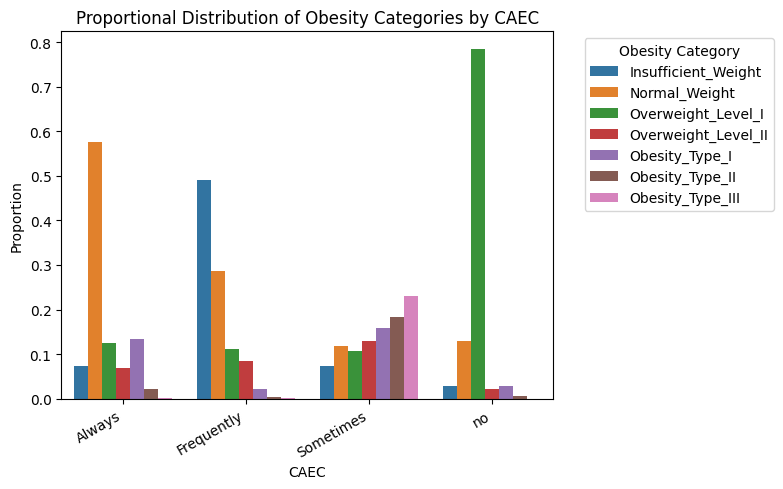

NObeyesdad  Insufficient_Weight  Normal_Weight  Overweight_Level_I  \
SMOKE                                                                
no                     0.122654       0.148004            0.117096   
yes                    0.028571       0.187755            0.102041   

NObeyesdad  Overweight_Level_II  Obesity_Type_I  Obesity_Type_II  \
SMOKE                                                              
no                     0.121728        0.140691         0.152781   
yes                    0.102041        0.097959         0.465306   

NObeyesdad  Obesity_Type_III  
SMOKE                         
no                  0.197046  
yes                 0.016327  


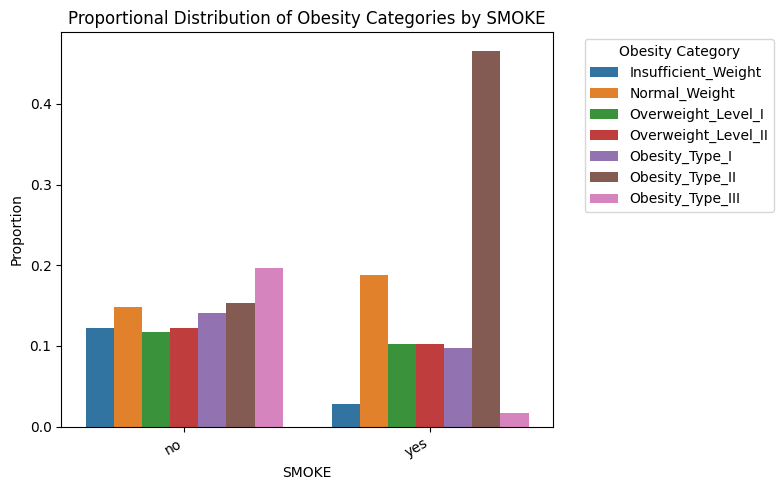

NObeyesdad  Insufficient_Weight  Normal_Weight  Overweight_Level_I  \
SCC                                                                  
no                     0.114145       0.145583            0.108515   
yes                    0.337700       0.232897            0.362445   

NObeyesdad  Overweight_Level_II  Obesity_Type_I  Obesity_Type_II  \
SCC                                                                
no                     0.124458        0.144088         0.161626   
yes                    0.034934        0.026201         0.005822   

NObeyesdad  Obesity_Type_III  
SCC                           
no                  0.201584  
yes                 0.000000  


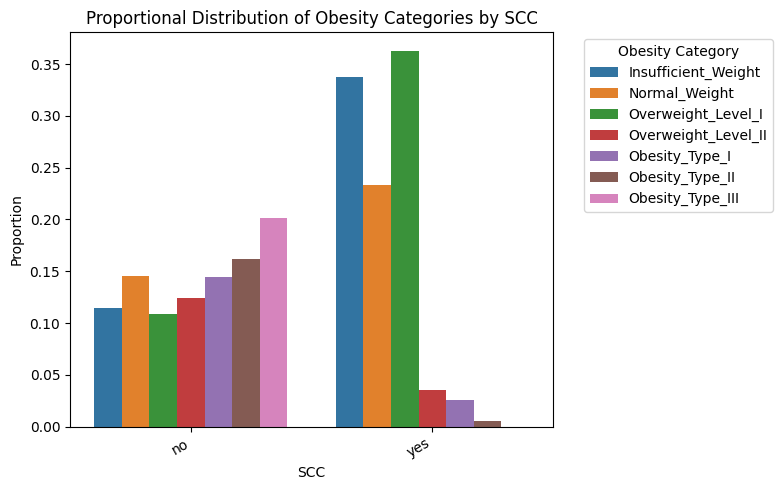

NObeyesdad  Insufficient_Weight  Normal_Weight  Overweight_Level_I  \
CALC                                                                 
Frequently             0.026465       0.128544            0.245747   
Sometimes              0.107527       0.128767            0.130094   
no                     0.172187       0.208019            0.065272   

NObeyesdad  Overweight_Level_II  Obesity_Type_I  Obesity_Type_II  \
CALC                                                               
Frequently             0.431002        0.143667         0.024575   
Sometimes              0.084893        0.095845         0.184322   
no                     0.196591        0.269223         0.088708   

NObeyesdad  Obesity_Type_III  
CALC                          
Frequently          0.000000  
Sometimes           0.268552  
no                  0.000000  


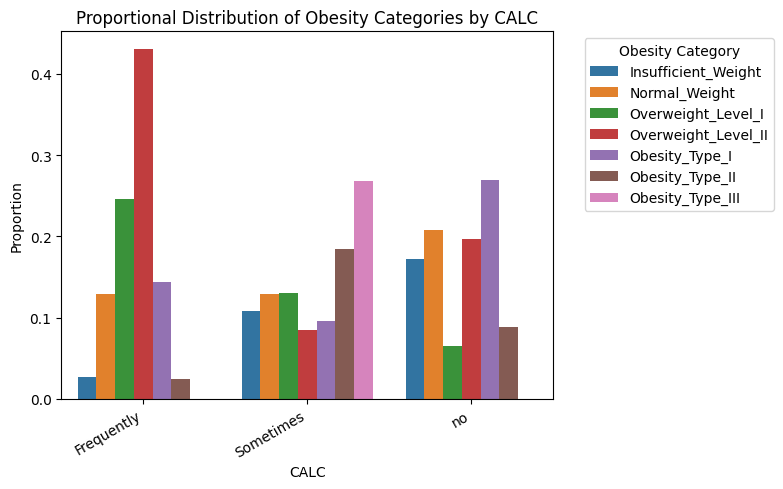

NObeyesdad             Insufficient_Weight  Normal_Weight  Overweight_Level_I  \
MTRANS                                                                          
Automobile                        0.078381       0.087436            0.134409   
Bike                              0.062500       0.437500            0.281250   
Motorbike                         0.105263       0.447368            0.184211   
Public_Transportation             0.129802       0.153712            0.109966   
Walking                           0.158458       0.379015            0.216274   

NObeyesdad             Overweight_Level_II  Obesity_Type_I  Obesity_Type_II  \
MTRANS                                                                        
Automobile                        0.221279        0.211375         0.267119   
Bike                              0.125000        0.062500         0.031250   
Motorbike                         0.078947        0.105263         0.078947   
Public_Transportation             0.0

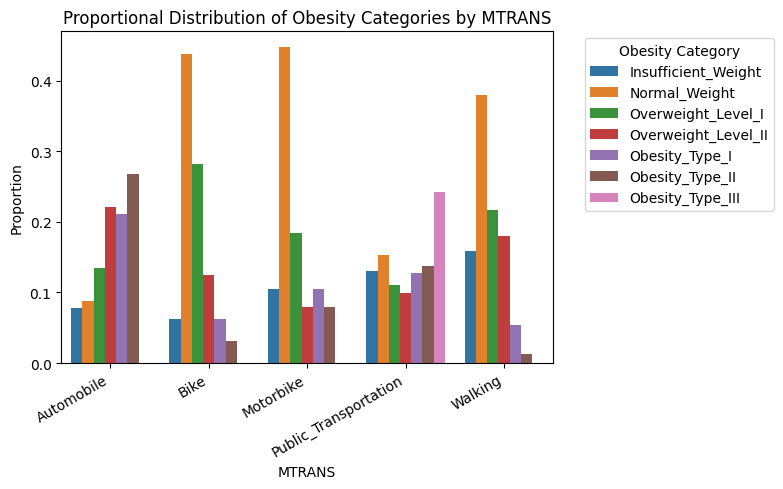

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define categorical predictors
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC','CAEC', 
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Define target class order
obesity_order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                 "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II","Obesity_Type_III"]

# Loop through each categorical variable
for var in categorical_vars:
    # Crosstab to get proportions
    ct = pd.crosstab(traindf[var], traindf['NObeyesdad'], normalize='index')
    
    # Reorder columns to match obesity_order
    ct = ct[obesity_order]
    
    # Convert to long format for seaborn
    ct_long = ct.reset_index().melt(id_vars=var, 
                                    value_vars=obesity_order,
                                    var_name="Obesity Category", 
                                    value_name="Proportion")
    
    # Plot proportions
    plt.figure(figsize=(8, 5))
    sns.barplot(data=ct_long, x=var, y="Proportion", hue="Obesity Category", 
                hue_order=obesity_order)
    
    plt.title(f"Proportional Distribution of Obesity Categories by {var}")
    plt.ylabel("Proportion")
    plt.xlabel(var)
    plt.xticks(rotation=30, ha="right")
    plt.legend(title="Obesity Category", bbox_to_anchor=(1.05, 1), loc="upper left")
    print(ct)
    plt.tight_layout()
    plt.show()

Based on the distribution of categories, we can rank the categories to convert them into numerical data that makes sense. The numerical values will be ranking values of overweight/obesity liklihood based on the distribution levels we analyzed in the previous step.

In [14]:
# Define mappings (ordinal encodings based on obesity severity)
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']
mappings={
"family_history_with_overweight":{"no": 1, "yes": 2},
"FAVC":{"no": 1, "yes": 2},
"CAEC":{"no":1,"Frequently": 2, "Always":3,"Sometimes": 4},
"SMOKE":{"no":1,"yes":2},
"SCC":{"yes":1,"no":2},
"CALC":{"Frequently": 1,"no": 2, "Sometimes": 3,"Always":4},
 "MTRANS":{"Walking": 1,"Bike": 2, "Motorbike": 3,"Public_Transportation":4,"Automobile":5}
}

In [15]:
#Apply Mappngs
for col, mapping in mappings.items():
    traindf[col+"_num"] = traindf[col].map(mapping)
#Apply Mappngs
for col, mapping in mappings.items():
    testdf[col+"_num"] = testdf[col].map(mapping)

Categorize the gender into binary as well

In [16]:
traindf["isMale"] = (traindf["Gender"] == "Male").astype(int)
testdf["isMale"] = (testdf["Gender"] == "Male").astype(int)

Let's remove some extra features. Since we added BMI earlier, which uses weight and height, those features should be re-visited.

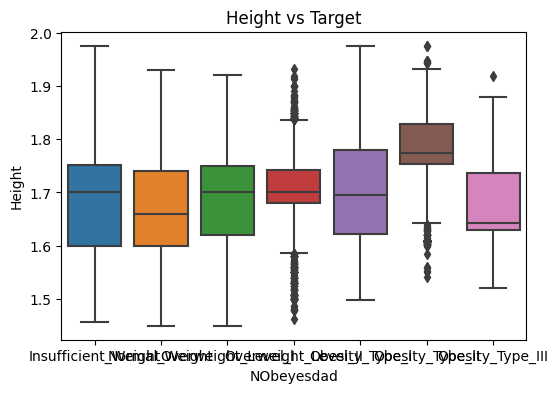

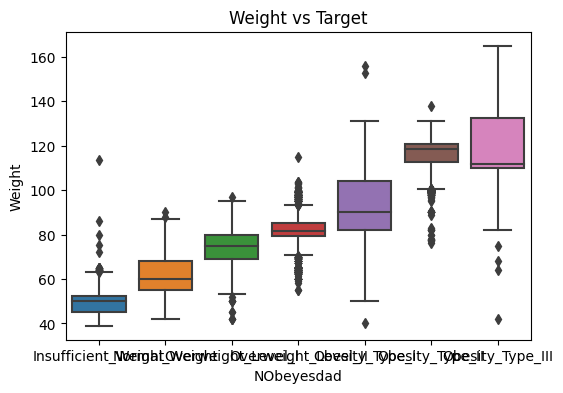

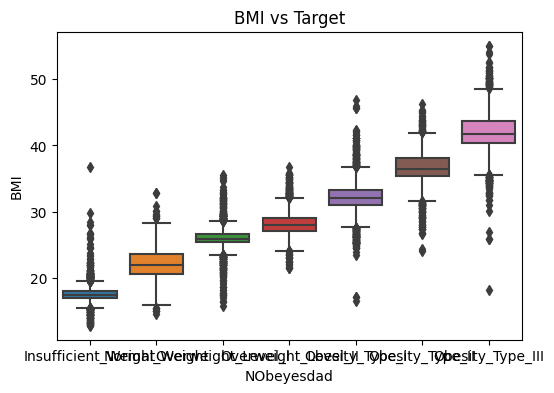

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ["Height", "Weight", "BMI"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=traindf['NObeyesdad'], y=col, data=traindf, order=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
                 "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II","Obesity_Type_III"])
    plt.title(f"{col} vs Target")
    plt.show()

BMI boxplot shows more distinction than height or weight, so we don't need those features. We can also remove the Gender column, since we created the "isMale" columns.

In [18]:
columns_to_drop = ['Height', 'Weight']+categorical_vars
traindf.drop(categorical_vars, axis = 1, inplace = True)
testdf.drop(categorical_vars, axis = 1, inplace = True)

<h1>Model</h1>
We are using K-means clustering as the unsupervised machine learning algorithm for this project.
K-means is good at finding hidden patterns and can rveal natural groups in the data.
With many feature, k-means simplifies the dataset into cluster labels that can be analyzed.
We can tune the hyperparameters n_clusters, and initialization method.

Normalize the numerical data for unsupervised learning.

In [19]:
traindf_y=traindf['NObeyesdad'] 
traindf_x= traindf.drop('NObeyesdad', axis=1)   
scaler = StandardScaler()
traindf_scaled = scaler.fit_transform(traindf_x)

In [20]:
print(traindf_scaled)

[[-1.73196737  0.10569857 -0.00282826 ...  0.58679112 -0.16060204
   1.0041516 ]
 [-1.73180049 -1.0270519  -1.60629083 ... -1.37119154  1.48084408
  -0.99586557]
 [-1.73163361 -1.0270519   0.12845138 ... -1.37119154 -0.16060204
  -0.99586557]
 ...
 [ 1.73163361 -0.65766899  1.36653688 ... -1.37119154 -0.16060204
   1.0041516 ]
 [ 1.73180049  1.76006735 -0.00280536 ... -1.37119154  1.48084408
   1.0041516 ]
 [ 1.73196737  0.49905134  1.33206194 ...  0.58679112 -0.16060204
   1.0041516 ]]


We know there are 7 natural groups, since our target has 7 obesity levels. k=7 is a reasonable starting point. However, since k-means doesn't use our labels, we should actually pick k based on how well the data clusters.
We can do this by using the elbow method to determine the optimal number of clusters.

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
wcss = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(traindf_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

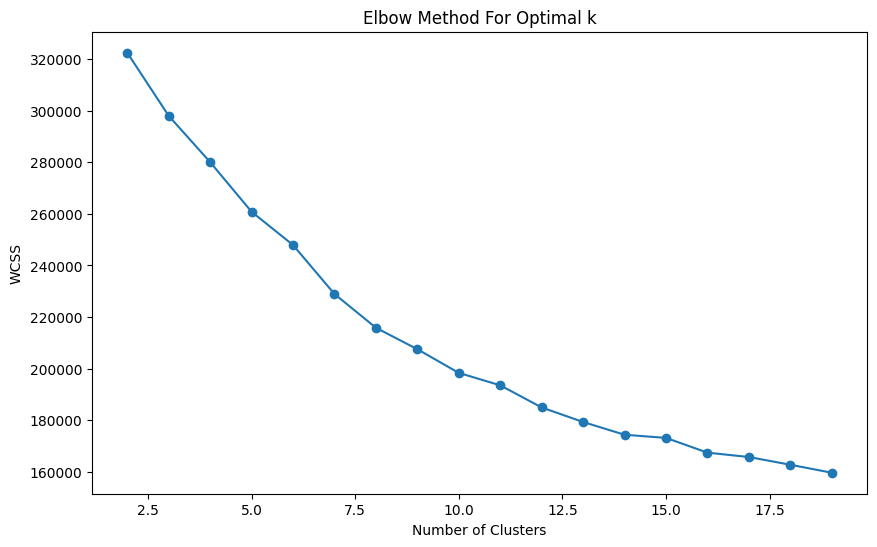

In [22]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Cluster 2 will be using the "random" initialization method. We can check which value for this parameter is optimal.

In [23]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(traindf_scaled)
traindf['Cluster'] = kmeans_labels
kmeans2 = KMeans(n_clusters=optimal_k, init='random', random_state=42)
kmeans_labels2 = kmeans2.fit_predict(traindf_scaled)
traindf['Cluster2'] = kmeans_labels2

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Let's try to match the clusters with the original target labels

Cluster                     0         1         2         3         4  \
NObeyesdad                                                              
Insufficient_Weight  0.002774  0.000000  0.504558  0.382085  0.002774   
Normal_Weight        0.023037  0.002271  0.394225  0.484101  0.014925   
Obesity_Type_I       0.209278  0.027835  0.005842  0.424055  0.008247   
Obesity_Type_II      0.126539  0.002463  0.000000  0.029249  0.035099   
Obesity_Type_III     0.000000  0.996293  0.000494  0.000494  0.000989   
Overweight_Level_I   0.129790  0.008241  0.231974  0.360527  0.010301   
Overweight_Level_II  0.269231  0.003569  0.053529  0.442109  0.009913   

Cluster                     5         6  
NObeyesdad                               
Insufficient_Weight  0.016250  0.091558  
Normal_Weight        0.031149  0.050292  
Obesity_Type_I       0.319244  0.005498  
Obesity_Type_II      0.806034  0.000616  
Obesity_Type_III     0.001730  0.000000  
Overweight_Level_I   0.158220  0.100948  
Overwe

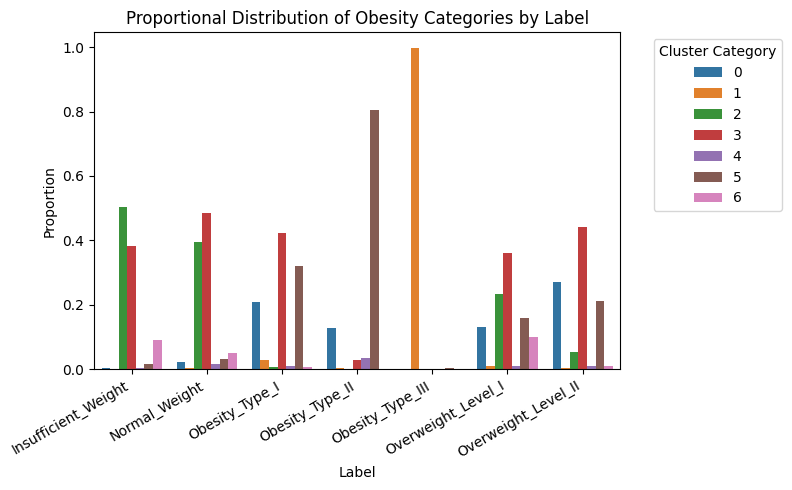

In [24]:
ct = pd.crosstab(traindf['NObeyesdad'], traindf['Cluster'], normalize='index')
    
# Reorder columns to match obesity_order
#ct = ct[obesity_order]

# Convert to long format for seaborn
ct_long = ct.reset_index().melt(id_vars='NObeyesdad', 
                                value_vars=[0,1,2,3,4,5,6],
                                var_name="Cluster Category", 
                                value_name="Proportion")

# Plot proportions
plt.figure(figsize=(8, 5))
sns.barplot(data=ct_long, x='NObeyesdad', y="Proportion", hue="Cluster Category" 
           )

plt.title(f"Proportional Distribution of Obesity Categories by Label")
plt.ylabel("Proportion")
plt.xlabel('Label')
plt.xticks(rotation=30, ha="right")
plt.legend(title="Cluster Category", bbox_to_anchor=(1.05, 1), loc="upper left")
print(ct)
plt.tight_layout()
plt.show()

Mapping for Clusters and Label

In [25]:
cluster_label_mappings={0: "Overweight_Level_II", 1: "Obesity_Type_III",2: "Insufficient_Weight",3: "Normal_Weight",4: "Obesity_Type_I",5: "Obesity_Type_II",6: "Overweight_Level_I"}
traindf['Cluster_Label']=traindf['Cluster'].map(cluster_label_mappings)
traindf['Cluster_Label2']=traindf['Cluster2'].map(cluster_label_mappings)

In [26]:
traindf['Cluster_str']=traindf['Cluster'].astype(str) 
y_pred=traindf['Cluster_str']
y_true=traindf['NObeyesdad']
traindf['Cluster_str2']=traindf['Cluster2'].astype(str) 
y_pred=traindf['Cluster_str2']
y_true=traindf['NObeyesdad']


In [27]:
acc = accuracy_score(traindf['NObeyesdad'], traindf['Cluster_Label'])
print("Accuracy using k-means++  "+ str(acc))
acc2 = accuracy_score(traindf['NObeyesdad'], traindf['Cluster_Label2'])
print("Accuracy using random init  "+str(acc2))

Accuracy using k-means++  0.49918103863570673
Accuracy using random init  0.0726948646305039


<h1>Part 4 Results and Discussion</h1>
We ran the k-means clustering algorithm on the training data. We did not need to split the training data into a test set because unsupervised machine learning algorithms do not consider the labels. Instead predictions are made for all observations in the training set without needing to be trained against the labels.
We achieve an accuracy of almost 50%, which is not ideal. However, it is better than randomly guessing (1/7).
Based on the hyperparameter tuning, we found k-means++ to be optimal over init for the initialization method. We also tuned n_clusters, but ended up using 7.

Let's run the algorithm against the test data and then submit our predictions.

In [28]:
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Encode string labels into integers (0–6)
le = LabelEncoder()
y_true = le.fit_transform(traindf['NObeyesdad'])   # categorical target → ints
# Suppose you already have:
# y_true = true labels (0–6 for your 7 categories)
# y_pred = cluster assignments from KMeans (0–6 for 7 clusters)
#traindf['Cluster_str']=traindf['Cluster'].astype(str) 
y_pred=traindf['Cluster']
#y_true=traindf['NObeyesdad'].astype(str) 
# Build confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Hungarian algorithm to maximize accuracy
row_ind, col_ind = linear_sum_assignment(-conf_mat)

# Build mapping: cluster -> true label
mapping = {col: row for row, col in zip(row_ind, col_ind)}
print(mapping)
# Apply mapping
y_pred_mapped = np.array([mapping[cluster] for cluster in y_pred])

# Accuracy
acc = accuracy_score(y_true, y_pred_mapped)
print("Cluster accuracy vs. true labels:", acc)

{2: 0, 3: 1, 4: 2, 5: 3, 1: 4, 6: 5, 0: 6}
Cluster accuracy vs. true labels: 0.49918103863570673


NObeyesdad  Insufficient_Weight  Normal_Weight  Overweight_Level_I  \
Cluster                                                              
0                      0.003346       0.033939            0.150574   
1                      0.000000       0.001684            0.004812   
2                      0.397192       0.379095            0.175663   
3                      0.166869       0.258266            0.151463   
4                      0.028571       0.187755            0.102041   
5                      0.008892       0.020820            0.083279   
6                      0.343750       0.230655            0.364583   

NObeyesdad  Overweight_Level_II  Obesity_Type_I  Obesity_Type_II  \
Cluster                                                            
0                      0.324570        0.291109         0.196463   
1                      0.002166        0.019490         0.001925   
2                      0.042122        0.005304         0.000000   
3                      0.1930

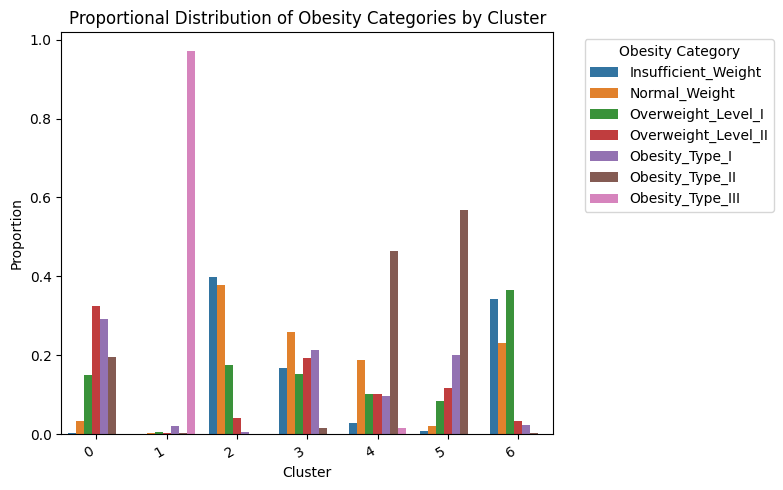

In [29]:
ct = pd.crosstab(traindf['Cluster'], traindf['NObeyesdad'], normalize='index')
    
# Reorder columns to match obesity_order
ct = ct[obesity_order]

# Convert to long format for seaborn
ct_long = ct.reset_index().melt(id_vars='Cluster', 
                                value_vars=obesity_order,
                                var_name="Obesity Category", 
                                value_name="Proportion")

# Plot proportions
plt.figure(figsize=(8, 5))
sns.barplot(data=ct_long, x='Cluster', y="Proportion", hue="Obesity Category", 
            hue_order=obesity_order)

plt.title(f"Proportional Distribution of Obesity Categories by Cluster")
plt.ylabel("Proportion")
plt.xlabel('Cluster')
plt.xticks(rotation=30, ha="right")
plt.legend(title="Obesity Category", bbox_to_anchor=(1.05, 1), loc="upper left")
print(ct)
plt.tight_layout()
plt.show()

Visualize the Clusters

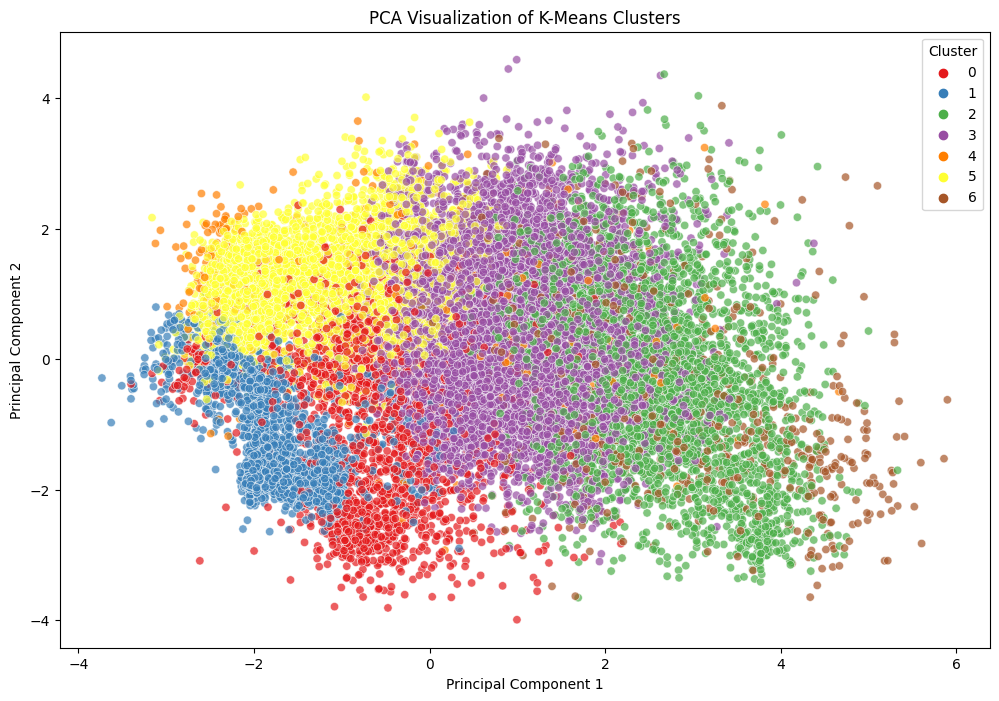

In [30]:

pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(traindf_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_labels
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('PCA Visualization of K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

There seem to be distinct clusters here, but there is a lot of overlap. 

Use the model to perform clustering on test dataset and then apply labels.

In [33]:
print(traindf_y)
print(traindf_x)

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object
          id        Age    Height      Weight      FCVC       NCP      CH2O  \
0          0  24.443011  1.699998   81.669950  2.000000  2.983297  2.763573   
1          1  18.000000  1.560000   57.000000  2.000000  3.000000  2.000000   
2          2  18.000000  1.711460   50.165754  1.880534  1.411685  1.910378   
3          3  20.952737  1.710730  131.274851  3.000000  3.000000  1.674061   
4          4  31.641081  1.914186   93.798055  2.679664  1.971472  1.979848   
...      ...        ...       ...         ...       ...       ...       ...   
20753  20753  25.137087  1.766626  114.187096  2.919584  3.000000  2.151809   
20

In [34]:
traindf_y=traindf['NObeyesdad'] 
traindf_x= traindf.drop('NObeyesdad', axis=1)
testdf_x= testdf
scaler = StandardScaler()
traindf_x.drop(['Cluster','Cluster_Label','Cluster_str'], axis = 1, inplace = True)
#traindf_scaled = scaler.fit_transform(traindf_x)
testdf_scaled = scaler.fit_transform(testdf_x)
test_and_train_df_nonscaled=pd.concat([traindf_x, testdf_x], axis=0)
test_and_train_df=np.concatenate((traindf_scaled, testdf_scaled), axis=0)
print(test_and_train_df)

[[-1.73196737  0.10569857 -0.00282826 ...  0.58679112 -0.16060204
   1.0041516 ]
 [-1.73180049 -1.0270519  -1.60629083 ... -1.37119154  1.48084408
  -0.99586557]
 [-1.73163361 -1.0270519   0.12845138 ... -1.37119154 -0.16060204
  -0.99586557]
 ...
 [ 1.73142507 -0.17537884 -1.27749479 ...  0.5935816  -0.18199171
  -0.99351812]
 [ 1.73167537 -0.50912784 -0.88932424 ... -1.36101496 -0.18199171
   1.00652417]
 [ 1.73192566  0.43764818  1.27679426 ...  0.5935816  -0.18199171
   1.00652417]]


In [35]:
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(test_and_train_df)
test_and_train_df_nonscaled['Cluster'] = kmeans_labels

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
cluster_label_mappings={0: "Overweight_Level_II", 1: "Obesity_Type_III",2: "Insufficient_Weight",3: "Normal_Weight",4: "Obesity_Type_I",5: "Obesity_Type_II",6: "Overweight_Level_I"}
#test_and_train_df_nonscaled['Cluster_Label']=test_and_train_df_nonscaled['Cluster'].map(cluster_label_mappings)

Map the clusters to the obesity risk levels. We need to this since the clusters don't have labels, just cluster ID's.

In [37]:
#Get cluster values from training set
num_train_rows=traindf.shape[0]

traindf_cluster=kmeans_labels[:num_train_rows]
testdf_cluster=kmeans_labels[num_train_rows:]
traindf['Cluster']=traindf_cluster
le = LabelEncoder()
y_true = le.fit_transform(traindf['NObeyesdad'])   # categorical target → ints
# y_true = true labels (0–6 for your 7 categories)
# y_pred = cluster assignments from KMeans (0–6 for 7 clusters)
y_pred=traindf['Cluster']
#y_true=traindf['NObeyesdad'].astype(str) 
# Build confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Hungarian algorithm to maximize accuracy
row_ind, col_ind = linear_sum_assignment(-conf_mat)

# Build mapping: cluster -> true label
mapping = {col: row for row, col in zip(row_ind, col_ind)}
decoded_data=decoded_data = le.inverse_transform(y_pred)
labelUpdate_mapping={col: row for row, col in zip(y_pred, decoded_data)}
#print(decoded_data)
#print(y_pred)
print(mapping)

# Apply mapping
y_pred_mapped = np.array([mapping[cluster] for cluster in y_pred])

# Accuracy
acc = accuracy_score(y_true, y_pred_mapped)


{0: 0, 3: 1, 4: 2, 2: 3, 1: 4, 6: 5, 5: 6}


Now let's find out which the encoding labels and then apply the labels to the test data and create the submission. Compare y_true to NObeyesdad to find out the encoding value.


In [38]:
cluster_to_category = {cluster: le.classes_[label_id] 
                       for cluster, label_id in mapping.items()}

testdf['ClusterCat_ID']=kmeans_labels[num_train_rows:]
testdf['ClusterCat_Name']=testdf['ClusterCat_ID'].map(cluster_to_category)

In [39]:
filename = 'submission.csv'
pd.DataFrame({'id': testdf['id'], 'NObeyesdad': testdf['ClusterCat_Name']}).to_csv(filename, index=False)

<h1>Conclusion</h1>

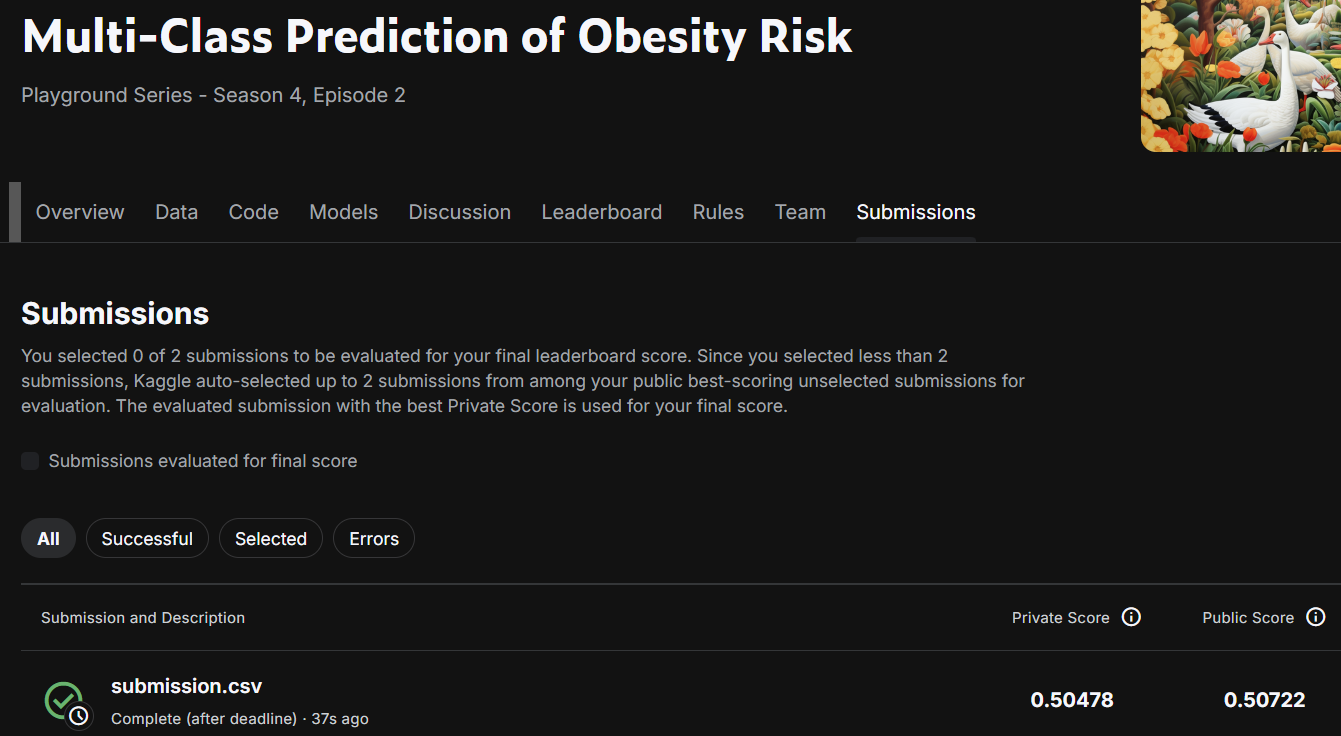

Our model score about 50% accuracy. This is not ideal, but it is definitely better than guessing (1/7). There are some takeaways and improvements to discuss. We used n_cluster=7 even though it was not optimal. We could have used n_cluster=18 based on the elbow method, but it would require a lot of effort to reassign the clusters to the proper obesity risk levels. This is something to be wary of and k-means cluster was possibly not the best choice. We could also improve the model by tuning more hyperparameters like tolerance or max_iter

References:
https://www.kaggle.com/competitions/playground-series-s4e2/overview
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
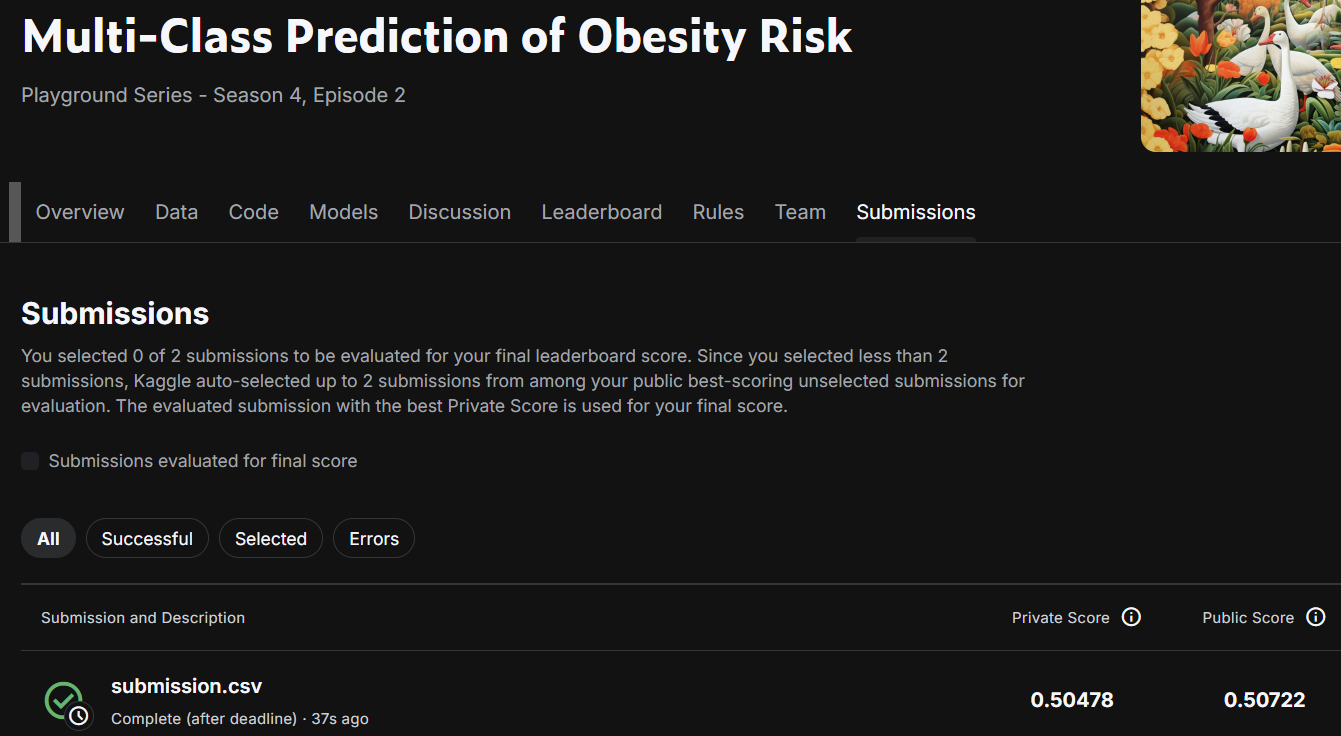